In [1]:
from scipy.stats import pearsonr
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import os
import random
import matplotlib
import matplotlib.pyplot as plt
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error

1. 팟캐스트별 댓글 길이를 구하고 (해결)
2. 첫번째EDA) 각각의 댓글 길이 분포 구한다: x축 댓글길이, y축 댓글 수
3. 두번째EDA) 한 그래프에 같이 보여준다.

# 팟빵 댓글 길이

In [2]:
podbbang = pd.read_csv('댓글합.csv', encoding='cp949')
podbbang.head()
podbbang.sample(600)

,Unnamed: 0,nickname,rating,title,voice,author,review,created,publish,genre
11786,11786,브람스00,100,일 잘하는 사람은 단순하게 합니다,"전해리,이승준",박소연,좋은 내용이네요,2020.09.30,더퀘스트,자기계발
3990,3990,신물방일,80,[공포괴담집] 무조건 모르는 척하세요,왓섭,문화류씨,불 끄고 소리로만 들으니 정말 무서워요.,2019.07.14,요다,소설문학
640,640,Reddington,100,살고 싶다는 농담,신경선,허지웅,목소리가 좋아요,2020.11.03,웅진지식하우스,소설문학
2465,2465,아시안컵,90,[남우현 낭독] 영화처럼 세이셀 (단편),남우현 (인피니트),공지희,인피니트짱 딴 멤버들도 듣고시퍼엉,2019.08.01,자음과 모음,소설문학
1045,1045,khan,100,좀머 씨 이야기,유석,파트리크 쥐스킨트,Being!!!\r\nLet it be,2020.08.11,(주)열린책들,소설문학
...,...,...,...,...,...,...,...,...,...,...
6144,6144,sksacyhpar,100,[김새벽 낭독] 인터내셔널의 밤 _ 작은책,김새벽,박솔뫼,좋아요,2019.07.05,아르테,소설문학
9107,9107,grave,80,최민식이 읽는 이범선의 오발탄,최민식,이범선,기모띠,2018.12.31,커뮤니케이션북스,오디오북스
11782,11782,새콤달콤냠냠,100,일 잘하는 사람은 단순하게 합니다,"전해리,이승준",박소연,잘 들었어요,2020.09.30,더퀘스트,자기계발
9978,9978,Hey부처핸썸,100,이희준이 읽는 김유정의 동백꽃,이희준,김유정,동백꽃이 이렇게 짧았나요? 더 듣고 싶은데ㅜ\r\n이희준씨 대사나 감정이 너무 좋네...,2018.12.02,커뮤니케이션북스,오디오북스


In [3]:
podbbang = podbbang.sample(600)

In [4]:
#podbbang_review = podbbang_600[~podbbang_600.isnull()]
#podbbang_review
podbbang['len'] = podbbang['review'].apply(lambda x: len(str(x)))
podbbang

,Unnamed: 0,nickname,rating,title,voice,author,review,created,publish,genre,len
5552,5552,dhshshznj,100,[한예리 낭독] 안락 _ 작은책,한예리,은모든,목소리가 듣기 좋네요,2019.07.10,아르테,소설문학,11
5457,5457,니스테르,100,[이음작가 단편] 누구의 잘못도 아닌,이음,이음,좋아요,2019.05.24,팟빵북스,소설문학,3
2406,2406,레미디오스,100,담배만이 우리 세상,남도형,류연웅,집중될수 밖에 없네요 잘 들었습니다,2019.09.23,안전가옥,소설문학,19
8725,8725,서연사랑해,100,최민식이 읽는 이범선의 오발탄,최민식,이범선,마치 영화를 보는듯한 리얼함~,2018.12.31,커뮤니케이션북스,오디오북스,16
15070,15070,상렬이형,100,[EBS 세계문학전집] 15소년 표류기,"정형석,박지윤",쥘 베른,팟캐로 들으니 새롭네요,2020.02.21,한국교육방송공사,어린이동화,12
...,...,...,...,...,...,...,...,...,...,...,...
14707,14707,짱구인생,90,[EBS 세계문학전집] 장발장,정형석,빅토르 위고,추억 돋는 장발장이네요 잘 들었어요,2020.02.20,한국교육방송공사,어린이동화,19
919,919,라틈,100,살고 싶다는 농담,신경선,허지웅,잘 들었습니다.,2020.10.30,웅진지식하우스,소설문학,8
12218,12218,하얀사슴,100,초등 감정 사용법,NaN,한혜원,잘들었습니다,2020.10.16,생각정원,자기계발,6
6423,6423,저는그러한면을삶아오지않았습니다,100,사월 바다(시 12편),NaN,도종환,믿고듣는 도종환의원님,2019.09.16,창비,소설문학,11


In [5]:
podbbang = podbbang.drop(['Unnamed: 0','nickname','rating','title','voice','author','created','publish','genre'], axis=1)
podbbang

,review,len
5552,목소리가 듣기 좋네요,11
5457,좋아요,3
2406,집중될수 밖에 없네요 잘 들었습니다,19
8725,마치 영화를 보는듯한 리얼함~,16
15070,팟캐로 들으니 새롭네요,12
...,...,...
14707,추억 돋는 장발장이네요 잘 들었어요,19
919,잘 들었습니다.,8
12218,잘들었습니다,6
6423,믿고듣는 도종환의원님,11


# 밀리 댓글 길이

In [6]:
millie = pd.read_csv('millie_review.csv', encoding='utf-8')
millie.sample(600).head()
millie

,Unnamed: 0,nickname,created,review
0,0,신사동댕댕이,2020.11.17,원래 띄엄띄어 읽어주는건가요? 처음이용해보는데 뭔가 불편하네요
1,1,착한 나르시스트_339074,2020.11.10,아... 오디오북은 연예인이고 뭐고 성우분들이 하는게 최고라는걸 느꼈네요.
2,2,우수한 꿈쟁이_982362,2020.11.06,서유리성우의 목소리가 달러구트꿈백화점 분위기와 참 잘어울리네요. 아껴듣고싶어요
3,3,특별한 도깨비_863371,2020.12.01,완독본 아닌가요??
4,4,비타민77,2020.11.30,전체가 아니라ㅜㅠ
...,...,...,...,...
637,637,새로운 지식인_538634,2019.07.17,Great
638,638,건강한 알파고_744202,2020.11.24,엄마는 처음이라...
639,639,용희마더,2020.11.21,감동아닌 억지.엄마가 되보면 안다
640,640,명묭이,2020.11.05,꿈깨세요 할때 웃음빵.


In [7]:
#millie_review = millie_600[~millie_600.isnull()]
#millie_review
millie['len'] = millie['review'].apply(lambda x: len(str(x)))
millie

,Unnamed: 0,nickname,created,review,len
0,0,신사동댕댕이,2020.11.17,원래 띄엄띄어 읽어주는건가요? 처음이용해보는데 뭔가 불편하네요,34
1,1,착한 나르시스트_339074,2020.11.10,아... 오디오북은 연예인이고 뭐고 성우분들이 하는게 최고라는걸 느꼈네요.,41
2,2,우수한 꿈쟁이_982362,2020.11.06,서유리성우의 목소리가 달러구트꿈백화점 분위기와 참 잘어울리네요. 아껴듣고싶어요,43
3,3,특별한 도깨비_863371,2020.12.01,완독본 아닌가요??,10
4,4,비타민77,2020.11.30,전체가 아니라ㅜㅠ,9
...,...,...,...,...,...
637,637,새로운 지식인_538634,2019.07.17,Great,5
638,638,건강한 알파고_744202,2020.11.24,엄마는 처음이라...,11
639,639,용희마더,2020.11.21,감동아닌 억지.엄마가 되보면 안다,19
640,640,명묭이,2020.11.05,꿈깨세요 할때 웃음빵.,12


In [8]:
millie = millie.drop(['Unnamed: 0','nickname','created'], axis=1)
millie

,review,len
0,원래 띄엄띄어 읽어주는건가요? 처음이용해보는데 뭔가 불편하네요,34
1,아... 오디오북은 연예인이고 뭐고 성우분들이 하는게 최고라는걸 느꼈네요.,41
2,서유리성우의 목소리가 달러구트꿈백화점 분위기와 참 잘어울리네요. 아껴듣고싶어요,43
3,완독본 아닌가요??,10
4,전체가 아니라ㅜㅠ,9
...,...,...
637,Great,5
638,엄마는 처음이라...,11
639,감동아닌 억지.엄마가 되보면 안다,19
640,꿈깨세요 할때 웃음빵.,12


# 윌라 댓글 길이

In [16]:
welaa = pd.read_csv('welaa_review.csv', encoding='utf-8')
welaa = welaa.sample(600)

In [10]:
#welaa_review = welaa[~welaa['review'].isnull()]
#welaa_review = welaa_600[~welaa_600.isnull()]
#welaa_review

In [17]:
#welaa_review['length'] = welaa_review.apply(lambda x: len(x))
welaa['len'] = welaa['review'].apply(lambda x: len(str(x)))
welaa

,Unnamed: 0,nickname,created,review,len
3194,3194,이혁제,2019.09.23 20:11,여러시각을 반영하지 않고 한가지 시각으로만 해석했네요\n엄청 데이터를 기반으로 한것...,128
2677,2677,SJ,2020.10.10 17:26,정신과 의사 특유의 정신승리가 자기 자랑 처럼 보일 수 있으나. 직업적 특성이라 이...,80
3161,3161,나,2020.07.01 13:34,그냥 그러네요 큰 도움은 없음\n심리 상담사가 흔히하는 말들…,33
994,994,유지예,2020.11.18 01:48,나를 바꾼책,6
4034,4034,문자영,2020.08.08 21:53,다양한과학지식이쌓이는기분입니다\n하지만뭔가방대한설명이마무리가덜되는느낌도드네요,41
...,...,...,...,...,...
2273,2273,서애신,2020.07.17 11:26,최고 ~~^^,7
2786,2786,Kanghee Roh,2019.06.13 09:58,듣고 있는데 드라마 형식의 오디오북~ 너무 재밌습니다!!,31
2009,2009,석현,2019.11.06 13:49,NaN,3
2010,2010,YJ,2019.10.31 15:05,꼭 듣고싶었는데!! 감사합니다^^,18


In [20]:
welaa = welaa.drop(['Unnamed: 0','nickname','created'], axis=1)
welaa

,review,len
3194,여러시각을 반영하지 않고 한가지 시각으로만 해석했네요\n엄청 데이터를 기반으로 한것...,128
2677,정신과 의사 특유의 정신승리가 자기 자랑 처럼 보일 수 있으나. 직업적 특성이라 이...,80
3161,그냥 그러네요 큰 도움은 없음\n심리 상담사가 흔히하는 말들…,33
994,나를 바꾼책,6
4034,다양한과학지식이쌓이는기분입니다\n하지만뭔가방대한설명이마무리가덜되는느낌도드네요,41
...,...,...
2273,최고 ~~^^,7
2786,듣고 있는데 드라마 형식의 오디오북~ 너무 재밌습니다!!,31
2009,NaN,3
2010,꼭 듣고싶었는데!! 감사합니다^^,18


# 네이버 댓글 길이

In [25]:
naver = pd.read_csv('naver_imsi_review.csv', encoding='utf-8')
naver = naver.sample(600).head()

In [26]:
#naver_review = naver_600[~naver_600.isnull()]
#naver_review

In [27]:
naver['len'] = naver['review'].apply(lambda x: len(str(x)))
naver

,Unnamed: 0,nickname,created,review,title,author,voice,len
781,14,smil****,2020-05-14 17:57,마지막장에 법정스님 목소리 들으니 너무 반갑고 그립습니다~♡,스스로 행복하라 (법정 스님 열반 10주기 특별판),법정,김영선,33
902,17,노엘눈썹,2020-04-21 03:26,마음 같아서는 지금 당장 이영도 작품 전부 오디오북으로 달리고 싶은 마음. 작가의 ...,오버 더 초이스,이영도,장민혁 정재헌 남도형 시영준 이원찬 곽윤상 이지현 사문영 김연우 윤용식 석승훈,108
713,9,ny,2019-10-25 21:51,요즘 마음이 힘들어서 듣게 되었는데 저는 원래 에세이랑 잘 안맞는데도 너무 좋았습니...,타인의 시선을 의식해 힘든 나에게,글배우,정원조,93
1318,3,hjh_****,2020-09-21 09:52,댓글 읽고 구매할걸 그랬어요... 너무 과장해서 읽으셔서 집중을 못하겠어요 ㅠㅠ,변신,프란츠 카프카,손상규,44
1158,2,우냐앙,2020-07-27 16:47,배경음악이 오리엔탈특급열차편보다 거슬리긴하네요....................,ABC 살인 사건,애거서 크리스티,임진응 외 7인,45


In [28]:
naver = naver.drop(['Unnamed: 0','nickname','created','title','author','voice'], axis=1)
naver

,review,len
781,마지막장에 법정스님 목소리 들으니 너무 반갑고 그립습니다~♡,33
902,마음 같아서는 지금 당장 이영도 작품 전부 오디오북으로 달리고 싶은 마음. 작가의 ...,108
713,요즘 마음이 힘들어서 듣게 되었는데 저는 원래 에세이랑 잘 안맞는데도 너무 좋았습니...,93
1318,댓글 읽고 구매할걸 그랬어요... 너무 과장해서 읽으셔서 집중을 못하겠어요 ㅠㅠ,44
1158,배경음악이 오리엔탈특급열차편보다 거슬리긴하네요....................,45


# 팟빵 히스토그램

(array([334., 150.,  46.,  28.,   9.,  12.,   9.,   3.,   1.,   2.,   2.,
          2.,   0.,   1.,   1.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150]),
 <a list of 15 Patch objects>)

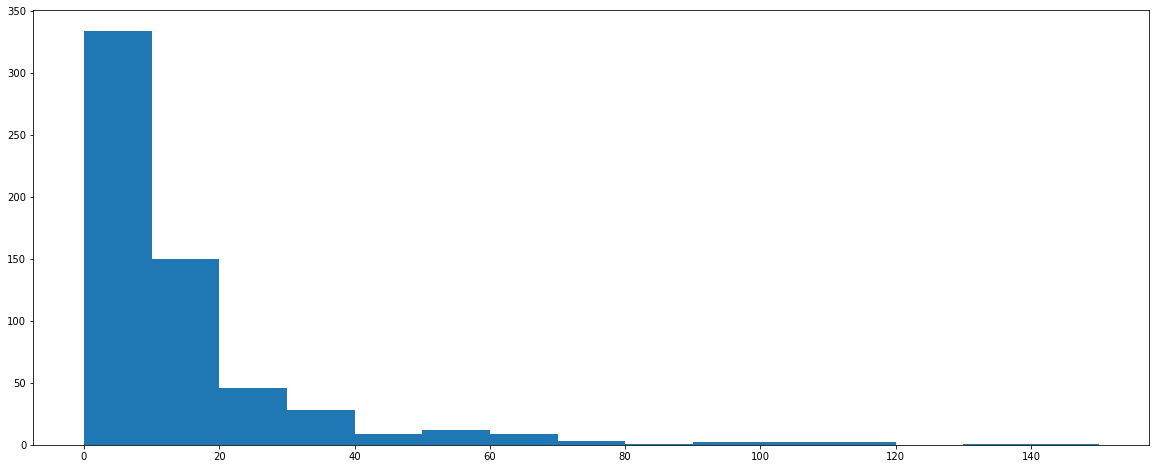

In [34]:
plt.figure(figsize=(20,8))
plt.hist(podbbang['len'],bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])

# 밀리 히스토그램

(array([184., 199.,  81.,  62.,  95.,  21.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150]),
 <a list of 15 Patch objects>)

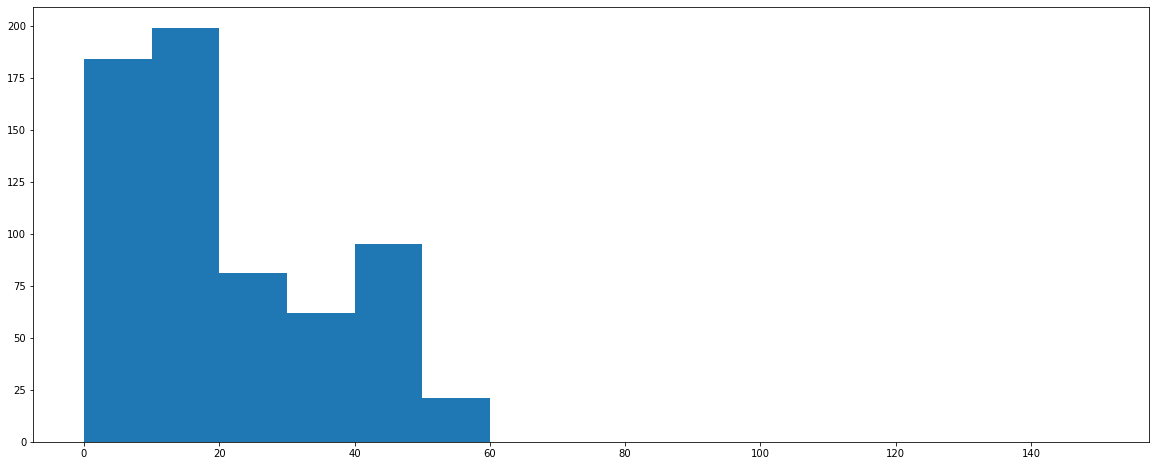

In [35]:
plt.figure(figsize=(20,8))
plt.hist(millie['len'],bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])

# 네이버 히스토그램

(array([0., 0., 0., 1., 2., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150]),
 <a list of 15 Patch objects>)

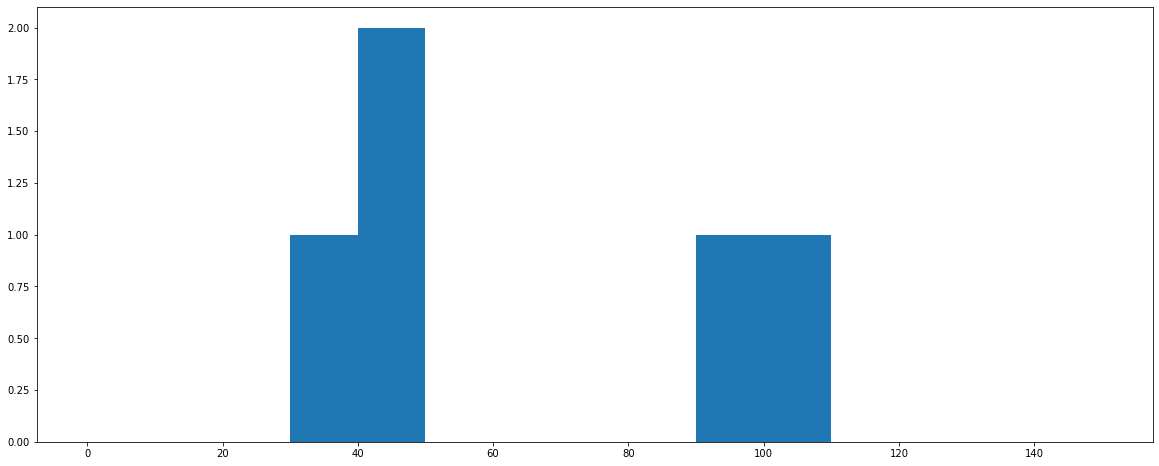

In [36]:
plt.figure(figsize=(20,8))
plt.hist(naver['len'],bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])

# 윌라 히스토그램

(array([ 96., 109.,  89.,  56.,  61.,  37.,  27.,  23.,  20.,  13.,   8.,
         11.,  12.,   5.,   1.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150]),
 <a list of 15 Patch objects>)

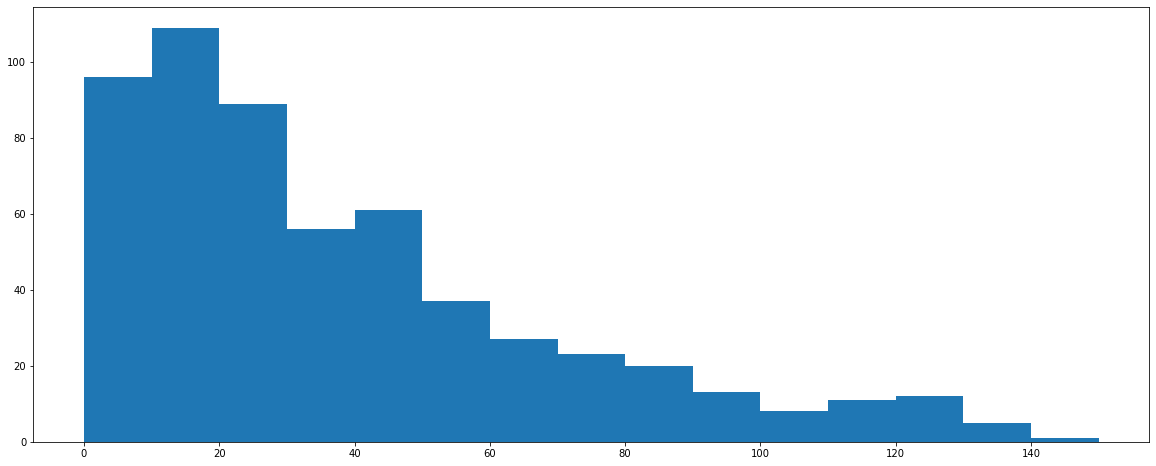

In [37]:
plt.figure(figsize=(20,8))
plt.hist(welaa['len'],bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])